In [336]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
%matplotlib inline

### Import dataset

In [256]:
covid_confirmed = pd.read_csv("time_series_covid19_confirmed_global.csv")
covid_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,18054,18969,19551,20342,20917,21459,22142,22890,23546,24102
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1197,1212,1232,1246,1263,1299,1341,1385,1416,1464
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,9831,9935,10050,10154,10265,10382,10484,10589,10698,10810
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,852,852,852,852,852,852,852,852,853,853
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,86,86,88,91,92,96,113,118,130,138


### Drop the irrelevant columns

In [257]:
### axis=1 -> column-wise operation
### inplace = True -> Overwrite the dataframe object

irrelevant_col = ['Lat','Long']

covid_confirmed.drop(irrelevant_col, axis=1, inplace=True)

In [258]:
### Check the dimension of the dataframe

covid_confirmed.shape

(266, 146)

In [200]:
### Check the first 10 rows 

covid_confirmed.head(10)

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,18054,18969,19551,20342,20917,21459,22142,22890,23546,24102
1,NaN,Albania,0,0,0,0,0,0,0,0,...,1197,1212,1232,1246,1263,1299,1341,1385,1416,1464
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,9831,9935,10050,10154,10265,10382,10484,10589,10698,10810
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,852,852,852,852,852,852,852,852,853,853
4,NaN,Angola,0,0,0,0,0,0,0,0,...,86,86,88,91,92,96,113,118,130,138
5,NaN,Antigua and Barbuda,0,0,0,0,0,0,0,0,...,26,26,26,26,26,26,26,26,26,26
6,NaN,Argentina,0,0,0,0,0,0,0,0,...,20197,21037,22020,22794,23620,24761,25987,27373,28764,30295
7,NaN,Armenia,0,0,0,0,0,0,0,0,...,11221,11817,12364,13130,13325,13675,14103,14669,15281,16004
8,Australian Capital Territory,Australia,0,0,0,0,0,0,0,0,...,107,107,108,108,108,108,108,108,108,108
9,New South Wales,Australia,0,0,0,0,3,4,4,4,...,3110,3110,3109,3112,3114,3117,3117,3115,3119,3128


### Sum up the Province/State in the same country (groupby Country/Region columns)

In [259]:
covid_confirmed = covid_confirmed.groupby('Country/Region').sum()

covid_confirmed.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,18054,18969,19551,20342,20917,21459,22142,22890,23546,24102
Albania,0,0,0,0,0,0,0,0,0,0,...,1197,1212,1232,1246,1263,1299,1341,1385,1416,1464
Algeria,0,0,0,0,0,0,0,0,0,0,...,9831,9935,10050,10154,10265,10382,10484,10589,10698,10810
Andorra,0,0,0,0,0,0,0,0,0,0,...,852,852,852,852,852,852,852,852,853,853
Angola,0,0,0,0,0,0,0,0,0,0,...,86,86,88,91,92,96,113,118,130,138


## Visualise the data

#### Total Confirmed Case 

In [265]:
### Select the newest day into new DataFrame called Covid_total, which has the total number of confirmed case
## Rename it as Total_Case
covid_total = pd.DataFrame(covid_confirmed.iloc[:,-1])
covid_total = covid_total.rename(columns={"6/13/20":"Total_Case"})
covid_total

,Total_Case
Country/Region,
Afghanistan,24102
Albania,1464
Algeria,10810
Andorra,853
Angola,138
...,...
West Bank and Gaza,489
Western Sahara,9
Yemen,705


In [266]:
### Sort the Total_case column in descending order, and save it to covid_total Dataframe

covid_total = covid_total.sort_values(by='Total_Case', ascending=False)
covid_total.head(10)

,Total_Case
Country/Region,
US,2074526
Brazil,850514
Russia,519458
India,308993
United Kingdom,295828
Spain,243605
Italy,236651
Peru,220749
France,193746


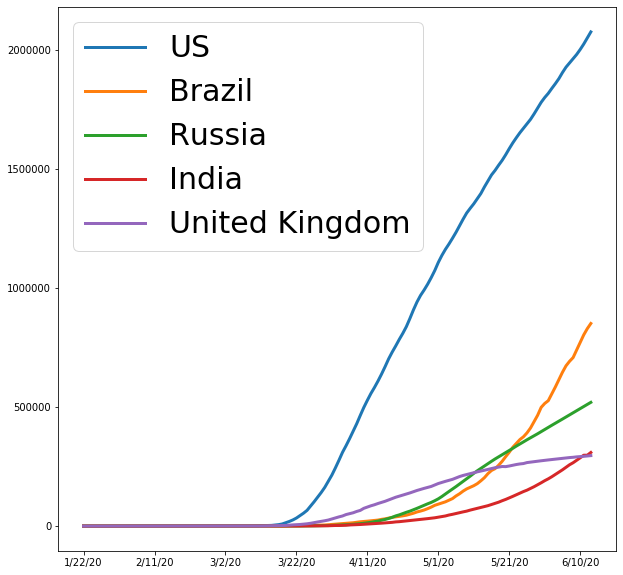

In [328]:
### Select 5 countries with the most confirmed cases, select countries (rows) by its position

covid_top5 = covid_total.iloc[:5].index
plt.figure(figsize=(10,10))
for c in covid_top5:
    covid_confirmed.loc[c].plot(linewidth=3)
    plt.legend(loc=2, prop={'size': 30})

str

#### Maximum daily confirmed case

In [333]:
### Make a copy from covid_confirmed called covid_diff
covid_diff = covid_confirmed.copy()
max_daily_new = []

for c in covid_diff.index: 
    max_daily_new.append(covid_diff.loc[c].diff().max())
covid_diff['Max_daily_increase'] = max_daily_new

### Only keep the last column, which is the maximum daily increase, in covid_diff dataframe
covid_diff = pd.DataFrame(covid_diff.iloc[:,-1])
covid_diff = covid_diff.sort_values(by='Max_daily_increase',ascending=False)
covid_diff

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,Max_daily_increase
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,18969,19551,20342,20917,21459,22142,22890,23546,24102,915.0
Albania,0,0,0,0,0,0,0,0,0,0,...,1212,1232,1246,1263,1299,1341,1385,1416,1464,48.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,9935,10050,10154,10265,10382,10484,10589,10698,10810,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,852,852,852,852,852,852,852,853,853,79.0
Angola,0,0,0,0,0,0,0,0,0,0,...,86,88,91,92,96,113,118,130,138,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,464,464,472,473,481,485,487,489,489,33.0
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,9,9,9,9,9,9,9,9,9,4.0
Yemen,0,0,0,0,0,0,0,0,0,0,...,469,482,484,496,524,560,591,632,705,73.0


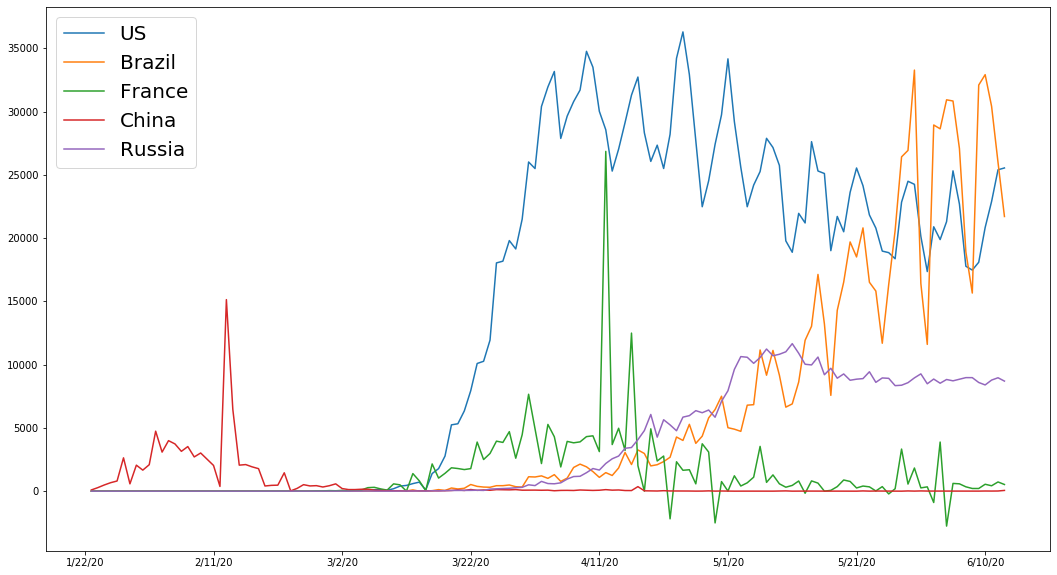

In [335]:
### Select the 5 countries with the most daily increase
covid_diff_top5 = covid_diff.iloc[:5].index

plt.figure(figsize=(18,10))
for c in covid_diff_top5:
    
    covid_confirmed.loc[c].diff().plot()
    plt.legend(loc=2, prop={'size': 20})


### Import World Happiness Dataset

In [411]:
world_happiness = pd.read_csv("worldwide_happiness_report.csv")
world_happiness.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [412]:
irrelevant_world_cols = ['Overall rank','Score']
world_happiness = world_happiness.drop(irrelevant_world_cols, axis=1)
world_happiness.set_index(['Country or region'], inplace=True)



GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
Total_Case                      7
dtype: int64

In [415]:
idx_rename = {'US':'United States', 'Korea, South': 'South Korea','Taiwan*':'Taiwan','Czechia':'Czech Republic',
              'Trinidad and Tobago':'Trinidad & Tobago',
              } 
covid_total_revised = covid_total.rename(index=idx_rename)
covid_total_revised

,Total_Case
Country/Region,
United States,2074526
Brazil,850514
Russia,519458
India,308993
United Kingdom,295828
...,...
Seychelles,11
MS Zaandam,9
Western Sahara,9


In [417]:
## Join world_happiness and covid_total_revised dataframe
covid_combine_W = world_happiness.join(covid_total_revised)
covid_combine_W.isnull().sum() # Show the number of null value

GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
Total_Case                      7
dtype: int64

In [418]:
### Drop the row with null value
covid_final = covid_combine_W.dropna(axis=0)
covid_final.isnull().sum()

GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
Total_Case                      0
dtype: int64

In [431]:
covid_final.columns

Index(['GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Total_Case'],
      dtype='object')

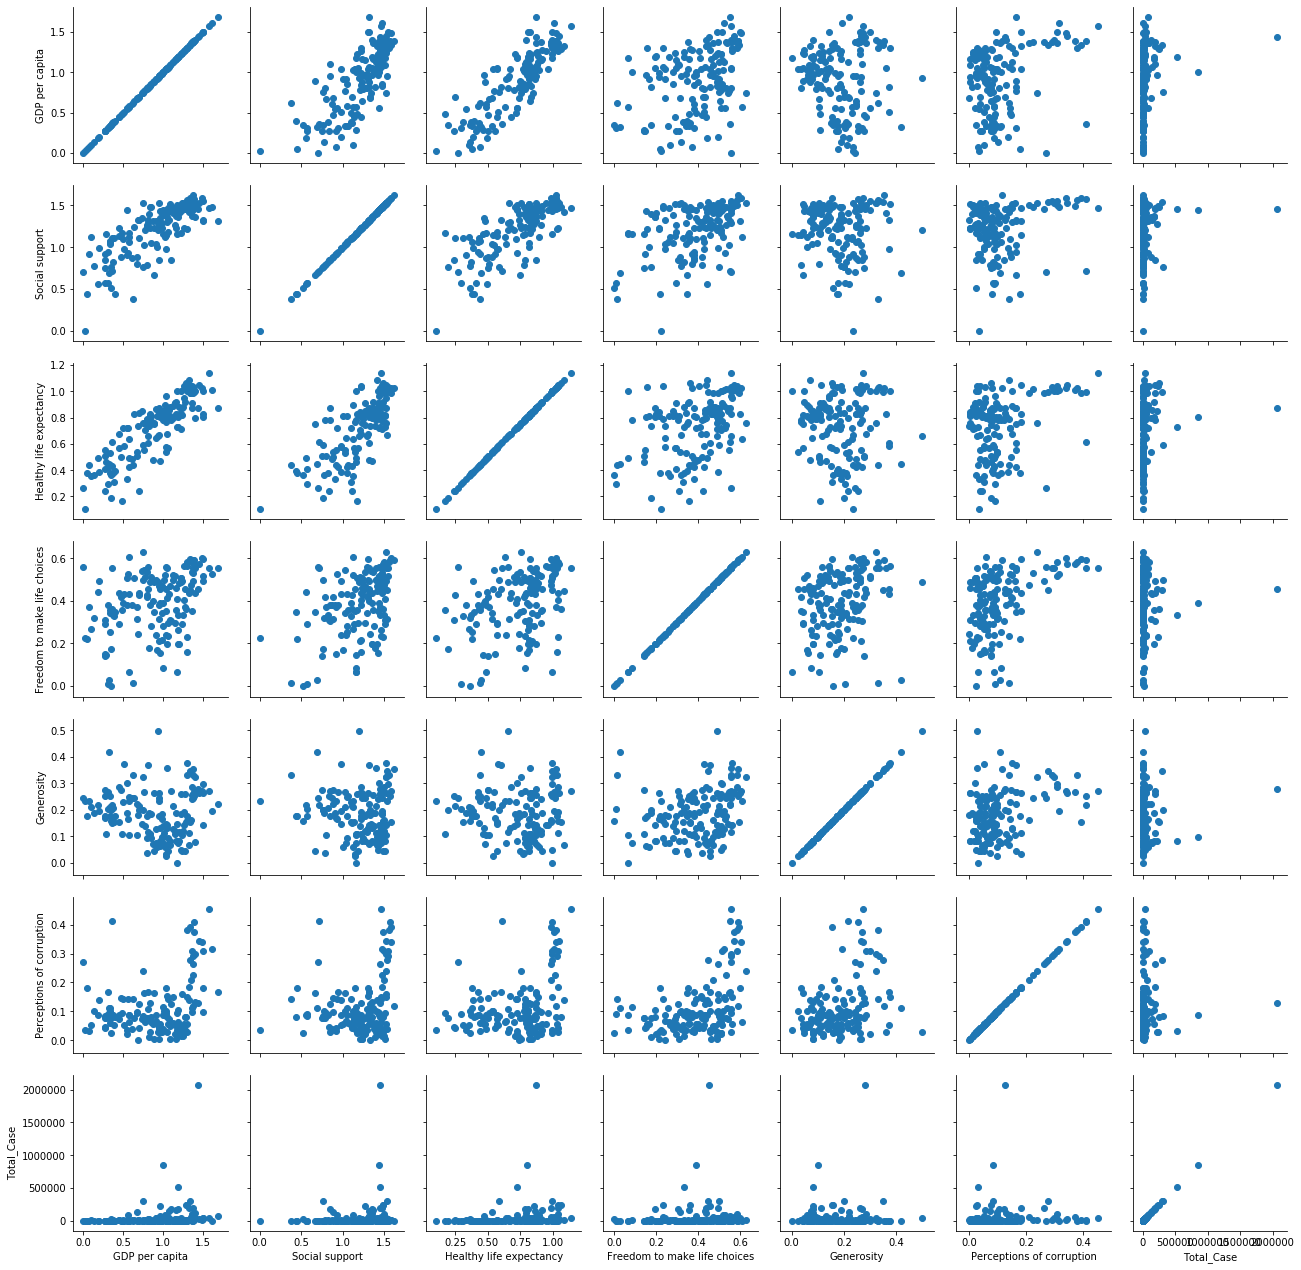

In [438]:
g = sns.PairGrid(covid_final, vars=['GDP per capita','Social support','Healthy life expectancy',
               'Freedom to make life choices','Generosity','Perceptions of corruption','Total_Case'])
g.map(plt.scatter)

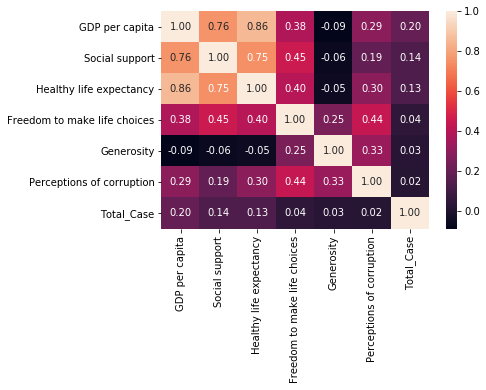

In [443]:
corr = covid_final.corr()
sns.heatmap(corr, annot=True, fmt=".2f")